In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("data/aapl-options-data-2020-2023"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/aapl-options-data-2020-2023/aapl_2016_2020.csv
data/aapl-options-data-2020-2023/aapl_2021_2023.csv


## Introduction

### This notebook serves as an introduction into the AAPL Daily Options Quotes: 2016-2020 dataset.

### If you find the content useful, please leave an upvote, comment, and/or follow!

We start by loading the data into a pandas dataframe. This dataset is rather large (n=1015352), so we must keep this in mind when working with our data. We will need to keep "big O" in mind to stay within the resource constraints of the Kaggle Jupyter notebook.


In [2]:
raw_df = pd.read_csv("data/aapl-options-data-2020-2023/aapl_2021_2023.csv")
raw_df

/tmp/ipykernel_33972/2890174497.py:1: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('data/aapl-options-data-2020-2023/aapl_2021_2023.csv')


,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.020000,-0.00093,0.00004,0.00011,-0.00547,0.0,4.889460,0.000000,68.9,0.496
1,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.010000,-0.00066,0.00001,0.00061,-0.00491,0.0,4.422080,0.000000,63.9,0.460
2,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.010000,-0.00108,0.00009,-0.00012,-0.00455,0.0,3.984220,0.000000,58.9,0.424
3,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.010000,-0.00100,0.00015,-0.00018,-0.00525,0.0,3.571790,0.000000,53.9,0.388
4,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,0.99404,0.00067,...,0.010000,-0.00138,0.00014,0.00025,-0.00453,0.0,3.180820,0.000000,48.9,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548158,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.14059,0.00348,...,112.2,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,131.9,0.955
548159,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.12515,0.00325,...,122.0,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,141.9,1.028
548160,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.10893,0.00298,...,132.24,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,151.9,1.100
548161,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.09147,0.00260,...,149.28,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,161.9,1.173


### I always use the info() method to look at the raw data. This will usually give me a pretty good picture of the information stored within the dataset.

The info() method gives the user each column's index, name, null count, and datatype. It also gives you the size of the dataset, as well as the beginning and final index. This information will be of great use when conducting feature engineering steps such as imputation and scaling, as well as general considerations throughout the project.

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548163 entries, 0 to 548162
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   [QUOTE_UNIXTIME]        548163 non-null  int64  
 1    [QUOTE_READTIME]       548163 non-null  object 
 2    [QUOTE_DATE]           548163 non-null  object 
 3    [QUOTE_TIME_HOURS]     548163 non-null  float64
 4    [UNDERLYING_LAST]      548163 non-null  float64
 5    [EXPIRE_DATE]          548163 non-null  object 
 6    [EXPIRE_UNIX]          548163 non-null  int64  
 7    [DTE]                  548163 non-null  float64
 8    [C_DELTA]              548163 non-null  float64
 9    [C_GAMMA]              548163 non-null  float64
 10   [C_VEGA]               548163 non-null  float64
 11   [C_THETA]              548163 non-null  float64
 12   [C_RHO]                548163 non-null  float64
 13   [C_IV]                 548163 non-null  object 
 14   [C_VOLUME]         

### It always helps to have clean columns names.

In this notebook, I simply used list comprehension to remove unwanted characters from the raw column names. This makes accessing and reading columns by their names easier.

In [4]:
columns = raw_df.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]

### Visualize to check code behavior!

It is important to make sure to visualize your transformations after each step as a method of code verification. We want to make sure that we are changing exactly what we intend to on the dataset, and nothing more.

In [5]:
raw_df.columns = columns

### Some columns will not be handled well when converting raw numeric strings to Python's integer and float datatypes.

Therefore, we will treat these features separately and join them again later.

In [6]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = raw_df.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")
numeric_cols

['QUOTE_UNIXTIME',
 'QUOTE_TIME_HOURS',
 'UNDERLYING_LAST',
 'EXPIRE_UNIX',
 'DTE',
 'C_DELTA',
 'C_GAMMA',
 'C_VEGA',
 'C_THETA',
 'C_RHO',
 'C_IV',
 'C_VOLUME',
 'C_LAST',
 'C_SIZE',
 'C_BID',
 'C_ASK',
 'STRIKE',
 'P_BID',
 'P_ASK',
 'P_SIZE',
 'P_LAST',
 'P_DELTA',
 'P_GAMMA',
 'P_VEGA',
 'P_THETA',
 'P_RHO',
 'P_IV',
 'P_VOLUME',
 'STRIKE_DISTANCE',
 'STRIKE_DISTANCE_PCT']

In [7]:
numeric_df = raw_df.drop(columns=date_columns)

for i in numeric_cols:
    numeric_df[i] = pd.to_numeric(numeric_df[i], errors="coerce")

numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548163 entries, 0 to 548162
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QUOTE_UNIXTIME       548163 non-null  int64  
 1   QUOTE_TIME_HOURS     548163 non-null  float64
 2   UNDERLYING_LAST      548163 non-null  float64
 3   EXPIRE_UNIX          548163 non-null  int64  
 4   DTE                  548163 non-null  float64
 5   C_DELTA              548163 non-null  float64
 6   C_GAMMA              548163 non-null  float64
 7   C_VEGA               548163 non-null  float64
 8   C_THETA              548163 non-null  float64
 9   C_RHO                548163 non-null  float64
 10  C_IV                 518320 non-null  float64
 11  C_VOLUME             493453 non-null  float64
 12  C_LAST               547968 non-null  float64
 13  C_SIZE               0 non-null       float64
 14  C_BID                547968 non-null  float64
 15  C_ASK            

### We see that many columns have missing values. We will need to deal with this in later steps.

The total number of rows in this dataset is 1015352, therefore any column that has a non-null count of less than this number will have missing values, or NaNs. This will propogate into an error during model training if not dealt with.

We can also see that the C_SIZE and P_SIZE columns both have zero non-null count. We should investigate this.

In [8]:
numeric_df["C_SIZE"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
548158   NaN
548159   NaN
548160   NaN
548161   NaN
548162   NaN
Name: C_SIZE, Length: 548163, dtype: float64

In [9]:
raw_df["C_SIZE"]

0            16 x 16
1              1 x 1
2              1 x 1
3              1 x 4
4            86 x 19
             ...    
548158        41 x 3
548159      54 x 182
548160     124 x 135
548161        91 x 5
548162         5 x 3
Name: C_SIZE, Length: 548163, dtype: object

### It looks like this column has no data, therefore we can drop it from the dataset.

This will organize our dataset and improve operation speed.

In [10]:
data = raw_df.drop(columns=["C_SIZE", "P_SIZE"])
data = data.drop(columns=date_columns)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548163 entries, 0 to 548162
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QUOTE_UNIXTIME       548163 non-null  int64  
 1   QUOTE_TIME_HOURS     548163 non-null  float64
 2   UNDERLYING_LAST      548163 non-null  float64
 3   EXPIRE_UNIX          548163 non-null  int64  
 4   DTE                  548163 non-null  float64
 5   C_DELTA              548163 non-null  float64
 6   C_GAMMA              548163 non-null  float64
 7   C_VEGA               548163 non-null  float64
 8   C_THETA              548163 non-null  float64
 9   C_RHO                548163 non-null  float64
 10  C_IV                 548163 non-null  object 
 11  C_VOLUME             548163 non-null  object 
 12  C_LAST               548163 non-null  object 
 13  C_BID                548163 non-null  object 
 14  C_ASK                548163 non-null  object 
 15  STRIKE           

### At this point, we should can either choose to reintroduce the time features to the dataset or leave them off.

I will leave this up to you! I'm curious what everyone will come up with!

This dataset is a good glimpse into what real world datasets look like. They are messy, sometimes in odd formats, and have a ton of missing data. That makes this dataset a great one to practice on, as you will use these skills in your day to day in a professional setting.

Remember that this dataset is a list of price quotes for Apple stock options (calls and puts, represented by C and P prefixes). Each row represents a quote at a given timestamp and strike price, therefore each day has a range of contract strike prices and its associated metadata and greeks. This makes the data difficult to work with, but offers a lot of variety to work with.

If you found this content useful, please leave an upvote, comment, and/or a follow! I would really appreciate it! Thanks for sticking around to the end of this introduction!

array([[<Axes: title={'center': 'DTE'}>]], dtype=object)

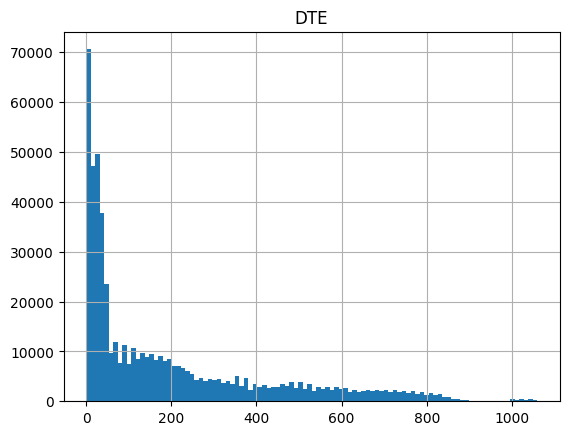

In [12]:
data.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [13]:
values = pd.DataFrame(data.DTE.value_counts())
values

,count
DTE,
3.00,8103
1.00,8097
2.00,8070
0.00,7887
8.00,7483
...,...
800.96,28
797.96,28
798.96,28


Text(0.5, 1.0, 'AAPL Stock Price - 2016 to 2020')

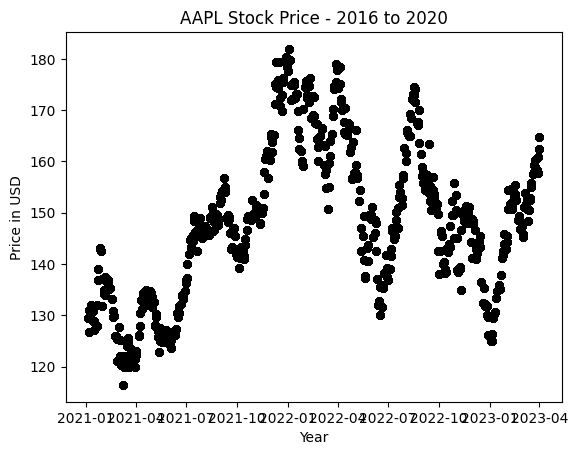

In [14]:
plt.scatter(
    pd.to_datetime(numeric_df["QUOTE_UNIXTIME"], unit="s"), numeric_df["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Year")
plt.title("AAPL Stock Price - 2016 to 2020")

### Notice that there is a discontinuity in the plot.

This is due to a stock split. This practice reduces the price of an individual share so that more investors can invest in the stock, as the option to purchase partial shares are only offered at certain brokerages. The market cap of the stock does not change, but the number of stocks available and the price of those stocks do during a split. This is reflected in the data and is not an error in the data.

### Feature extraction is a great way to derive insight and expand your dataset!

In this application, we will look at whether or not a contract is currently in the money (ITM) or out of the money (OTM).
